In [102]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters, transform
import numba
import matplotlib as mpl

image = io.imread('/home/vacilo/github/natural_artificial_vision/southern_ring_nebula.png')
baboon = io.imread('/home/vacilo/github/natural_artificial_vision/baboon.tiff')

In [103]:
#checking img shape
if image.ndim == 2:
    image_matrix = np.array(image)
elif image.ndim == 3:
    image_matrix = np.array(image)

print('Shape of the matrix:', image_matrix.shape)
print('Image matrix:')
print(image_matrix)

Shape of the matrix: (720, 770, 4)
Image matrix:
[[[  8   7   6 220]
  [ 10   6   5 237]
  [  7   5   5 237]
  ...
  [  6   6   6 237]
  [  6   6   6 237]
  [  6   6   6 237]]

 [[  7   6   6 242]
  [  7   6   5 255]
  [  9   5   4 255]
  ...
  [  6   6   5 255]
  [  6   6   5 255]
  [  6   6   5 255]]

 [[  9   6   6 237]
  [  8   6   6 255]
  [  7   6   5 255]
  ...
  [  6   6   5 255]
  [  6   6   5 255]
  [  6   6   5 255]]

 ...

 [[  6   6   6 237]
  [  6   6   7 255]
  [  7   7   7 255]
  ...
  [  3   3   3 255]
  [  4   4   4 255]
  [  3   3   4 255]]

 [[  7   7   7 242]
  [  7   7   7 255]
  [  8   8   9 255]
  ...
  [  3   4   4 255]
  [  4   3   4 255]
  [  3   3   4 255]]

 [[  7   8   8 220]
  [  7   7   7 237]
  [  7   7   8 237]
  ...
  [  3   3   4 237]
  [  2   4   4 237]
  [  3   4   5 237]]]


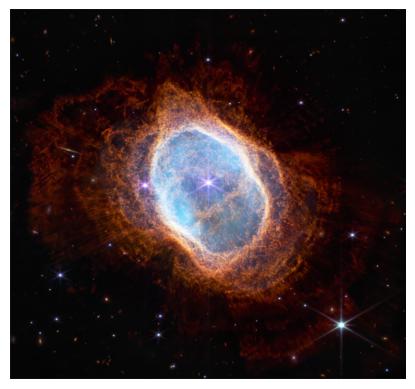

In [104]:
#plotting original img
plt.imshow(image)
plt.axis('off')
plt.show()

In [105]:
#turning img into gray
if image.shape[2] == 4:
    gray_img = color.rgb2gray(image[:,:,:3]) * image[:,:,3]
else:
    gray_img = color.rgb2gray(image)


(-0.5, 769.5, 719.5, -0.5)

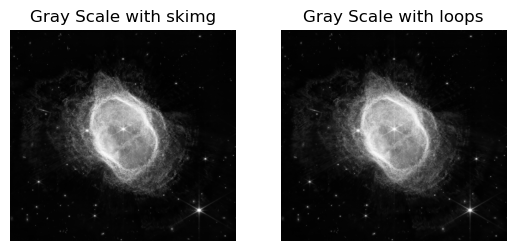

In [106]:
#turning img into gray by hand
height, width, channel = image.shape

gray_img_2 = np.zeros((height,width))

for i in range(height):
    for j in range(width):
        R = image[i,j,0]
        G = image[i,j,1]
        B = image[i,j,2]

        gray_img_2[i,j] = (1/3)*R + (1/3)*G + (1/3)*B


plt.subplot(1,2,1)
plt.imshow(gray_img, cmap='gray')
plt.title('Gray Scale with skimg')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(gray_img_2, cmap='gray')
plt.title('Gray Scale with loops')
plt.axis('off')

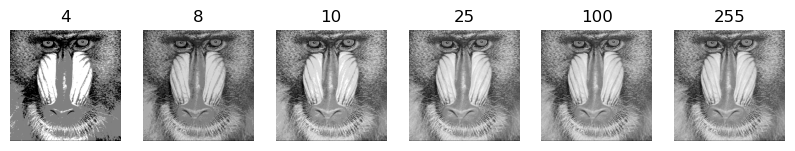

In [107]:
#testing different gray scales
levels_gray = [4, 8, 10, 25, 100, 255]

heightb, widthb, channelb = baboon.shape

different_gray_levels = np.zeros((heightb, widthb,len(levels_gray)), dtype=np.uint8)


for w in range(0, len(levels_gray)):
    different_gray_levels[:,:,w] = levels_gray[w]


for i in range(heightb):
    for j in range(widthb):
        R = baboon[i,j,0]
        G = baboon[i,j,1]
        B = baboon[i,j,2]

        current_gray = (1/3)*R + (1/3)*G + (1/3)*B
            
        #to account number of levels
        for k in range(0, len(levels_gray)):
            account_levels = int(current_gray/255 *(levels_gray[k] - 1)) * (255 // (levels_gray[k] - 1))
            different_gray_levels[i,j,k] = account_levels

if (different_gray_levels[:,:,1].all == different_gray_levels[:,:,3].all):
    print('paia')

gray_baboon = different_gray_levels[:,:,3]

plt.figure(figsize=(10,5))

for z in range(0, len(levels_gray)):
    plt.subplot(1, len(levels_gray), z+1)
    plt.imshow(different_gray_levels[:,:,z], cmap='gray')
    plt.title(levels_gray[z])
    plt.axis('off')



110


(-0.5, 511.5, 511.5, -0.5)

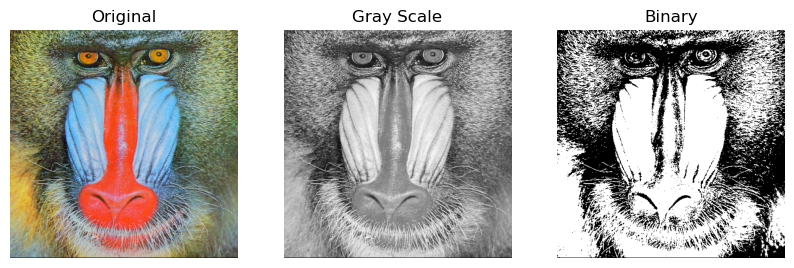

In [108]:
#binarizing the img
threshold_value_baboon = filters.threshold_otsu(gray_baboon)
binary_baboon = gray_baboon < threshold_value_baboon
print(threshold_value_baboon)

plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
plt.imshow(baboon)
plt.title('Original')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(gray_baboon, cmap='gray')
plt.title('Gray Scale')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(binary_baboon, cmap='binary')
plt.title('Binary')
plt.axis('off')



(-0.5, 769.5, 719.5, -0.5)

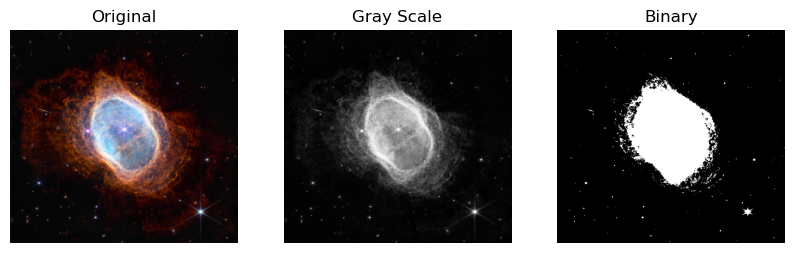

In [109]:
#binarizing the baboon
threshold_value = filters.threshold_otsu(gray_img)
binary_img = gray_img < threshold_value

plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
plt.imshow(image)
plt.title('Original')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(gray_img, cmap='gray')
plt.title('Gray Scale')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(binary_img, cmap='binary')
plt.title('Binary')
plt.axis('off')

4


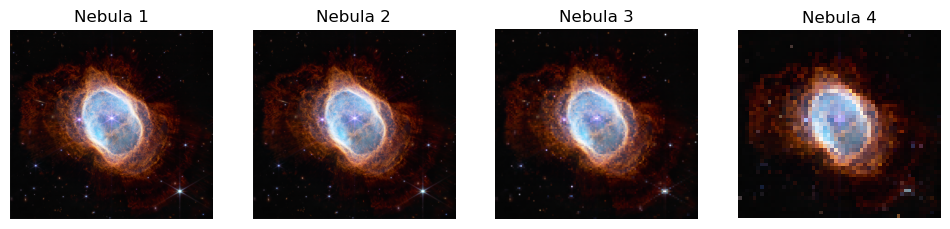

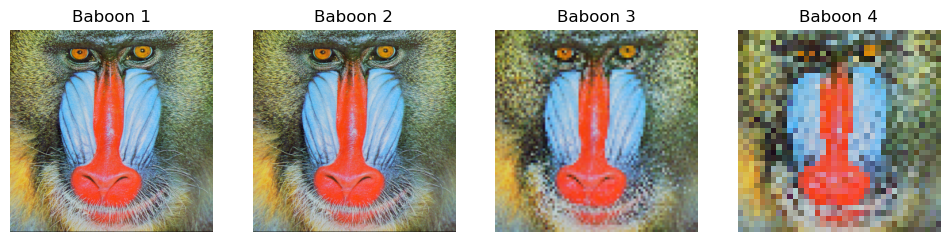

In [110]:
single_aspect = [1,2,6,14]
real_aspect = []
for i in range(len(single_aspect)):
    real_aspect.append((single_aspect[i])**2)

nebula_heights = [height/single_aspect[0], height/single_aspect[1], height/single_aspect[2], height/single_aspect[3]]
nebula_widths = [width/single_aspect[0], width/single_aspect[1], width/single_aspect[2], width/single_aspect[3]]

baboon_heights = [heightb/single_aspect[0], heightb/single_aspect[1], heightb/single_aspect[2], heightb/single_aspect[3]]
baboon_widths = [widthb/single_aspect[0], widthb/single_aspect[1], widthb/single_aspect[2], widthb/single_aspect[3]]

resized_nebulas = []
resized_baboons = []

for i in range(0, 4):
    resized_nebulas.append(transform.resize(image, (nebula_heights[i], nebula_widths[i]), anti_aliasing=False))
    resized_baboons.append(transform.resize(baboon, (baboon_heights[i], baboon_widths[i]), anti_aliasing=False))


print(len(resized_baboons))

plt.figure(figsize=(12,6))

for j in range(0,4):
    plt.subplot(1, 4, j+1)
    plt.imshow(resized_nebulas[j])
    plt.title(f'Nebula {j+1}')
    plt.axis('off')

plt.figure(figsize=(12, 6))

for j in range(0,4):
    plt.subplot(1, 4, j+1)
    plt.imshow(resized_baboons[j])
    plt.title(f'Baboon {j+1}')
    plt.axis('off')


plt.show()


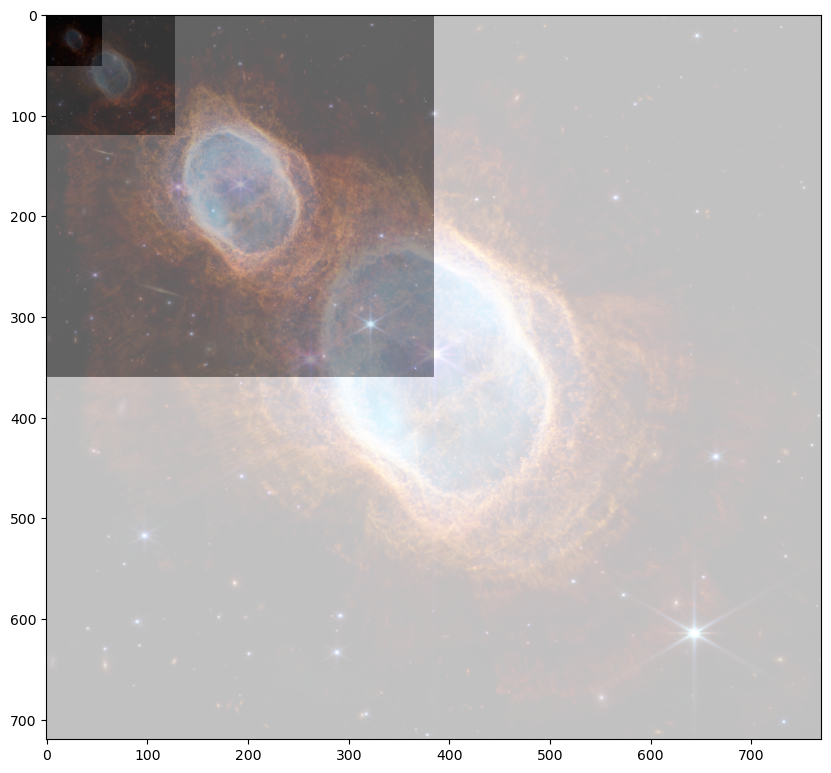

In [111]:
plt.figure(figsize=(10,10),dpi=(100/(single_aspect[0]**2)))

plt.imshow(resized_nebulas[3],alpha=1)
plt.imshow(resized_nebulas[2],alpha=0.5)
plt.imshow(resized_nebulas[1],alpha=0.5)
plt.imshow(resized_nebulas[0],alpha=0.25)

plt.axis('on')
plt.show()

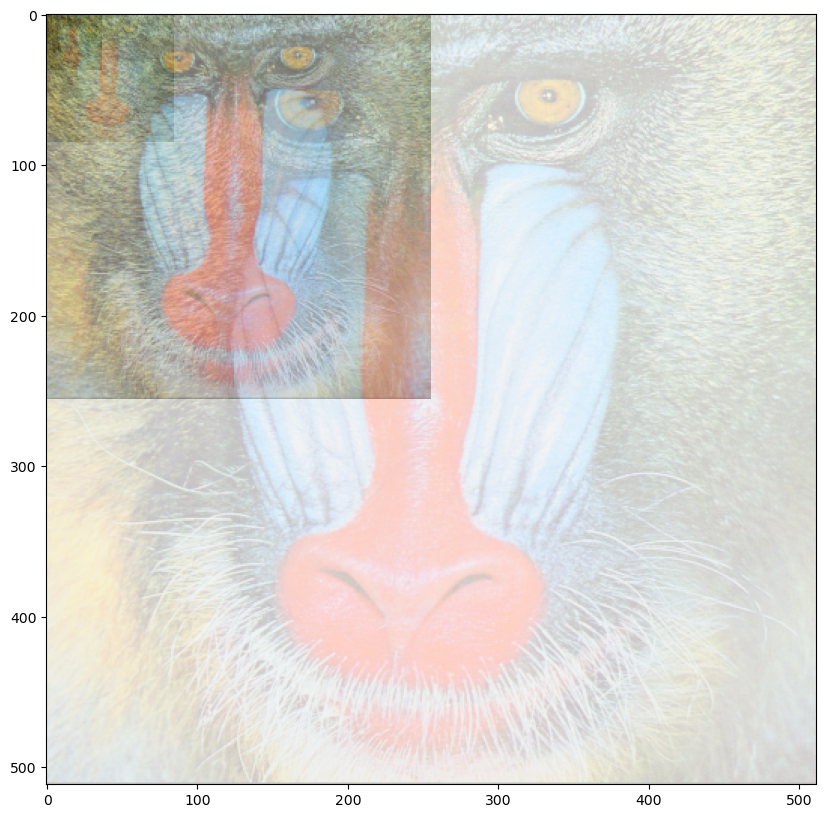

In [112]:
plt.figure(figsize=(10,10),dpi=(100/(single_aspect[0]**2)))

plt.imshow(resized_baboons[3],alpha=1)
plt.imshow(resized_baboons[2],alpha=0.5)
plt.imshow(resized_baboons[1],alpha=0.5)
plt.imshow(resized_baboons[0],alpha=0.25)

plt.axis('on')
plt.show()

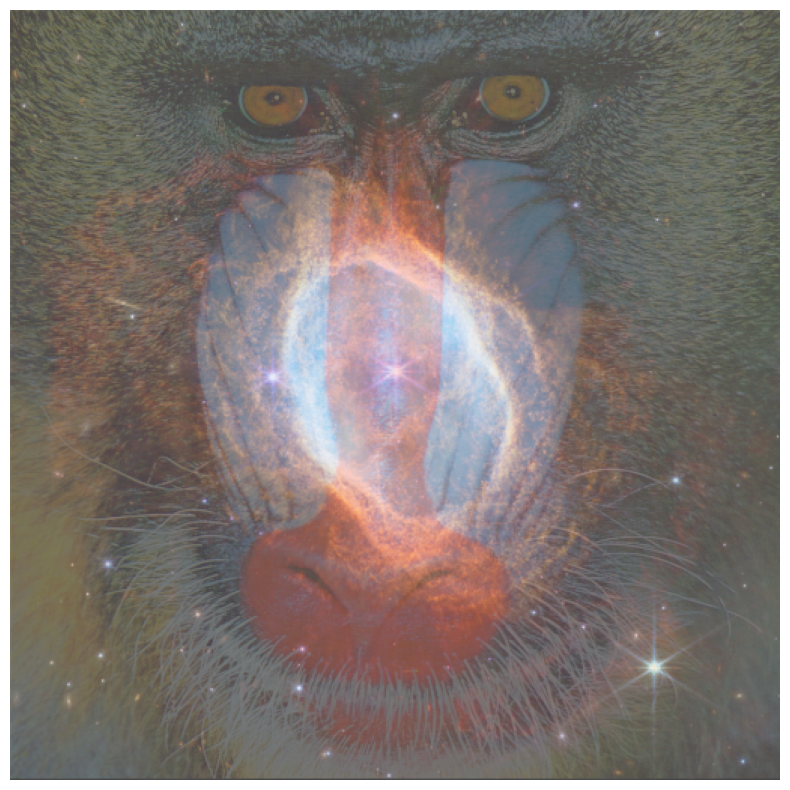

In [113]:
#babuino estelar
plt.figure(figsize=(10,10))

nebulosa_baboon = transform.resize(image, (512, 512), anti_aliasing=True)

plt.imshow(baboon, alpha=0.5)
plt.imshow(nebulosa_baboon, alpha=0.5)




plt.axis('off')
plt.show()

(512, 512, 3)


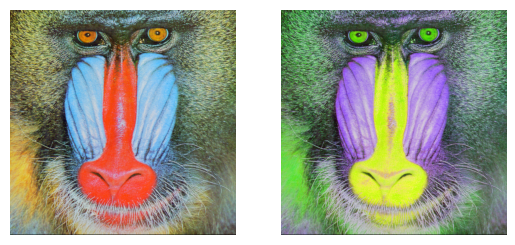

In [114]:
#changing the hue
baboon_hsv = color.rgb2hsv(baboon)
print(baboon_hsv.shape)
hue_shift = 60 #degrees
baboon_hsv[..., 0] = (baboon_hsv[...,0] + hue_shift/360) %1.0
baboon_change_hue = color.hsv2rgb(baboon_hsv)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(baboon)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(baboon_change_hue)
plt.axis('off')

plt.show()

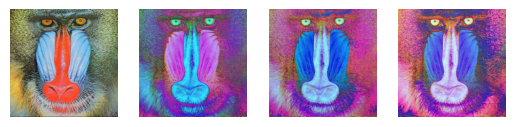

In [115]:
various_hue_shifts = [60,180,270]
baboon_hsv = color.rgb2hsv(baboon)

baboon_with_changed_hues = []

for i in range(len(various_hue_shifts)):
    baboon_hsv = color.rgb2hsv(baboon)
    baboon_hsv[..., 0] = (baboon_hsv[...,0] + various_hue_shifts[i]/360) %1.0
    baboon_with_changed_hues.append(baboon_hsv)

plt.figure()

plt.subplot(1,4,1)
plt.imshow(baboon)
plt.axis('off')

for j in range(len(various_hue_shifts)):
    plt.subplot(1,4,j+2)
    plt.imshow(baboon_with_changed_hues[j])
    plt.axis('off')

plt.show()

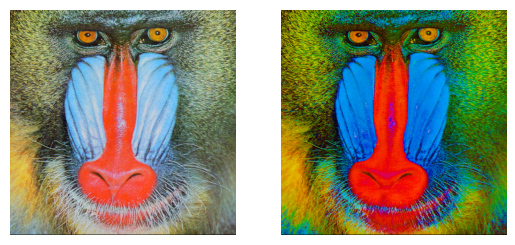

In [116]:
#changing the saturation
baboon_hsv = color.rgb2hsv(baboon)
saturation_factor = 10

baboon_hsv[..., 1] = np.clip(baboon_hsv[...,1]*saturation_factor, 0, 1)

baboon_change_saturation = color.hsv2rgb(baboon_hsv)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(baboon)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(baboon_change_saturation)
plt.axis('off')

plt.show()

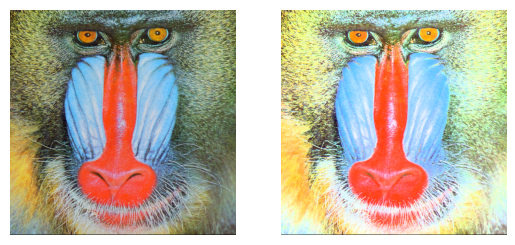

In [117]:
#changing the value (intensity is not calculated in SKimage)
baboon_hsv = color.rgb2hsv(baboon)

value_factor = 2

baboon_hsv[..., 2] = np.clip(baboon_hsv[...,2]*value_factor, 0, 1)

baboon_change_value = color.hsv2rgb(baboon_hsv)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(baboon)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(baboon_change_value)
plt.axis('off')

plt.show()

In [118]:
#function for changing saturation or value

def change_with_factor(k, factor, figure): # k determines saturation=1 or value=2
    if not(k==1 or k==2):
        return print('impossible')
    else:
        hsv_figure = color.rgb2hsv(figure)
        hsv_figure[...,k] = np.clip(hsv_figure[...,k]*factor, 0, 1)
        new_figure = color.hsv2rgb(hsv_figure)
    return new_figure

vector_of_factors = [1.5,3,6,10]



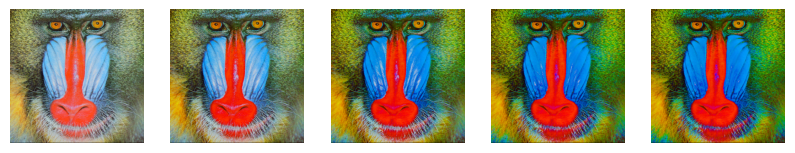

In [119]:
#scaling saturation

plt.figure(figsize=(10,5))

plt.subplot(1,5,1)
plt.imshow(baboon)
plt.axis('off')

scaling_sat_baboons = []

for i in range(len(vector_of_factors)):
    scaling_sat_baboons.append(change_with_factor(1,vector_of_factors[i],baboon))


for j in range(len(vector_of_factors)):
    plt.subplot(1,5,j+2)
    plt.imshow(scaling_sat_baboons[j])
    plt.axis('off')

plt.show()

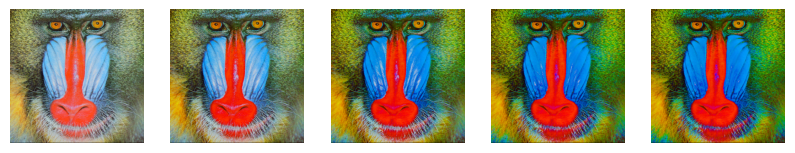

In [120]:
#scaling value

plt.figure(figsize=(10,5))

plt.subplot(1,5,1)
plt.imshow(baboon)
plt.axis('off')

scaling_value_baboons = []

for i in range(len(vector_of_factors)):
    scaling_value_baboons.append(change_with_factor(1,vector_of_factors[i],baboon))


for j in range(len(vector_of_factors)):
    plt.subplot(1,5,j+2)
    plt.imshow(scaling_value_baboons[j])
    plt.axis('off')

plt.show()


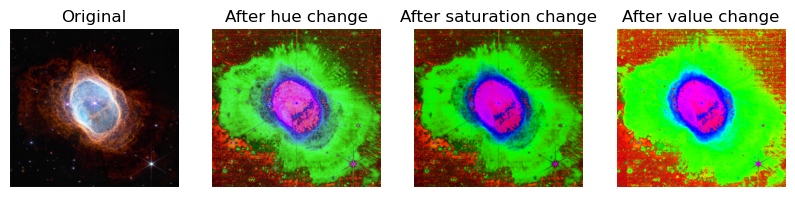

In [125]:
#image with all changed
nebula_hsv = color.rgb2hsv(image[:,:,:3])

hue_shift = 90 #degrees
factor = 3 

nebula_hsv[..., 0] = (nebula_hsv[...,0] + hue_shift/360) %1.0
nebula_only_hue = nebula_hsv

nebula_hue_saturation = change_with_factor(1,factor,nebula_only_hue)
nebula_all = change_with_factor(2,factor,nebula_hue_saturation)

plt.figure(figsize=(10,5))

plt.subplot(1,4,1)
plt.imshow(image)
plt.title('Original')
plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(nebula_only_hue)
plt.title('After hue change')
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(nebula_hue_saturation)
plt.title('After saturation change')
plt.axis('off')

plt.subplot(1,4,4)
plt.imshow(nebula_all)
plt.title('After value change')
plt.axis('off')

plt.show()
